<a href="https://colab.research.google.com/github/DavidSenseman/BIO5853/blob/master/Lesson_01_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO5853: Biostatistics**

## **Lesson_01_4: Charts**

##### **Module I: Variability**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)

### Module 1 Material
* Part 1.1: Getting Started with Google COLAB
* Part 1.2: Python Basics 1 -- Syntax, Operators, Expressions
* Part 1.3: Python Basics 2 -- Functions, Variables, Strings
* **Part 1.4: Python Basics 3 -- Charts**
* Part 1.5: Python Basics 4 -- Numerical Summary Measures

#### In this assignment you will learn about:

* Bar Charts
* Histograms
* Box Plots
* Scatter Plots
* Line Graphs

### Google CoLab Instructions

The following code will map your GDrive to ```/content/drive``` and print out your Google GMAIL address.

In [ ]:
# You must run this cell second
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

## **Graphs**

Visualizing biostatistical data in graphical format is crucial for several reasons:

* **Revealing Hidden Patterns:** Graphics reveal features that statistics and models may miss, such as unusual data distributions, local patterns, clusters, gaps, outliers, and more1. These visual cues can stimulate research and suggest new ideas.
* **Data Exploration:** Graphs help us explore data structure, detect outliers, identify trends, and spot local patterns. They provide an intuitive way to become familiar with the data before diving into detailed analysis1.
* **Data Cleaning:** Visualizations help identify data quality issues, such as missing values or evidence of rounding. By examining graphs, we can clean and preprocess the data effectively.
* **Presenting Results:** Graphical displays make it easier for others to understand and interpret findings. A well-designed plot can convey complex information succinctly.

The primary objective of this lesson is to show you the Python code that can be used to generate the various graphs and plots that are presented in section **2.3 Graphs** in your textbook starting on page 24.

### Data Input

Before we can generate a graph we need to get access to the dataset that is shown in the graph. Today, datasets are mostly stored on the Internet in computer known as a **fileserver**. The file server for this course has the following URL 

<https://biologicslab.co>

 In addition, there a number of private and government websites we you can download biological and medical data sets. Here are 3 examples:

1. **Kaggle:** Kaggle offers open datasets on various topics, including biology. You can explore and download datasets related to computer vision, natural language processing (NLP), and more 
2. **data.world:** This platform hosts 65 biology datasets contributed by users and organizations worldwide.
3. **DagsHub:** DagsHub provides free open biology datasets for developing and training machine learning models.

### Pandas

One of the most common ways to download data from the internet using Python uses a software package called Pandas.

**_Pandas_** (pronounced as "PAN-daz") is a Python package designed for data manipulation and analysis. It provides data structures and operations for manipulating numerical tables and time series. 

Pandas is built on top of the Numpy package and provides a high-level interface for working with data including data selection, cleaning, filtering, aggregation, and visualization. 

A central concept in Pandas is the **_DataFrame_**. A Pandas DataFrame is generally the most commonly used Pandas object. 

A _DataFrame_ is a two-dimensional labeled data structure with columns of potentially different data types (e.g. integers, floats, and strings). They are very similar to an Excel spreadsheet in which each **_row_** represents a single experimental subject or clinical patient and each **_column_** contains a different experimental or clinical measurement from the subject.


### The Pandas Package

Like other Python packages, Pandas has to be _imported_ into a Python program with the following command before it can be used.

`import pandas as pd`

The normal _alias_ ('nickname') for Pandas is `pd`. When using a method that is part of a Pandas package, the alias `pd` will be used instead of the package name. For example, to use the Pandas `read_csv()` method, the command would be:

`pd.read_csv(filename)`

where `pd` standards for `pandas`.

## **Bar Charts**

As your textbook points out, graphs are an important way to summarize data. Following your textbook, we begin with a very common type of graph, the **_bar chart_**.

A bar chart, also known as a bar graph, is a visual representation of data using rectangular bars. Here’s why it’s important:

1. **Easy to Understand:** Bar charts are widely used because they are simple to interpret. Most audiences grasp the information they convey without difficulty.
2. **Comparison and Trends:** They allow us to compare different categories or groups by representing values as bars. Additionally, bar charts can show changes over time, making them useful for visualizing trends.
3. **Storytelling Medium:** Beyond mere numbers, bar charts become a medium for storytelling and simplifying complex information. They cater to both experts and novices3.

## Example 1: Recreate FIGURE 2.1

Figure 2.1 in your textbook has the following legend:

~~~text
Bar chart: Major long-term health conditions experienced by Australian adults, 2014–2015; MBC = mental and behavioral conditions.
~~~
Let's see how we can create this chart ourselves and along the way, learn a little more about Python programming.

### Example 1A: Download Dataset

The data used to generate FIGURE 2.1 can be found in a file called `australia_diseases.csv`. The file extension, `.csv` stands for `comma separated variables` which means each piece of data in this file is separated from each other by a comma.

The Python code in the cell below uses the Pandas function `pd.read_csv()` to read the dataset `australia_diseases.csv` from the course file server. As the file is read, a Pandas DataFrame called `adDF` is created. There is nothing "magical" about the name `adDF` and we could have called it `AustrailiaDiseasesData` or simply `df`. As part of the _Zen of Python Programming_ shorter variable names are preferred to longer ones. In this course, I typically name a new DataFrame with a short pre-fix like `ad` followed by `DF` to remind you (and me) that this is a DataFrame.

Whenever you create a new DataFrame, it's **always** a good idea to display some of the DataFrame's contents to make sure everything went according to plan. The code at the botton of cell sets the maximum rows and columns to display to `6` and then displays the contents of `adDF`.

In [25]:
# Example 1A: Read data file and create Pandas DataFrame

import pandas as pd

# Read the datafile 
adDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/australia_diseases.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 6) 

# Display DataFrame
display(adDF)

,disease,percent
1,Mental and Behavioral Conditions,19.600000
2,Arthritis,19.799999
3,Hypertension,14.600000
...,...,...
8,Osteoporosis,4.500000
9,Cancer,2.100000
10,Kidney Disease,1.100000


If the code is correct, you should see the following table:

![___](https://biologicslab.co/BIO5853/images/lesson_01_1_image1.png)


### Example 1B: Create Bar Chart

Now that the austrailian disease data is stored in our DataFrame, `adDF`, we can create the bar chart shown in FIGURE 2.1.

The first line of code `import matplotlib.pyplot as plt`. Matplotlib is a powerful plotting library in Python that serves as a visualization utility. It's primary purpose is to provide users with tools and functionality to represent data graphically. It makes data analysis and understanding easier by creating static, animated, and interactive visualizations.

This next code snippet sorts the values in the DataFrame so the largest one (`Arithitis`) will be at the top of the graph:

~~~text
# Sort data
adDF.sort_values(by=['percent', 'disease'], ascending=True, inplace=True)
~~~

To make our graph look like FIGURE 2.1, we need to rename the category called `Mental and Behavioral Conditions` simply `MBC` using the next code snippet:

~~~text
adDF['disease'] = adDF['disease'].cat.rename_categories({'Mental and Behavioral Conditions': 'MBC'})
~~

Now we are ready to go ahead and assign values to `x` and `y` using this code snippet:

~~~text
# Assign x and y
x=adDF['percent']
y=adDF['disease']
~~~

This notation means that our `x` values will be the values (numbers) in the DataFrame column called `percent` while the `y` values will be the values in the DataFrame column called `disease`. 

Like a lot of programming, the actual line of code to generate the actual bar plot is fairly short:

~~~text
# Plot the bar chart
plt.barh(y, x, align='edge', color='#294171')
~~~~

The reason that the color value `#294171` looks a little odd, is that I was trying to closely match the color of the bar chart as it appears on my Kindle app. If you just wanted to make the color blue, you could have simply used `color='b'` or `color='r'` for red, or `color='k'` for black.

The rest of the code simply as the appropiate labels.

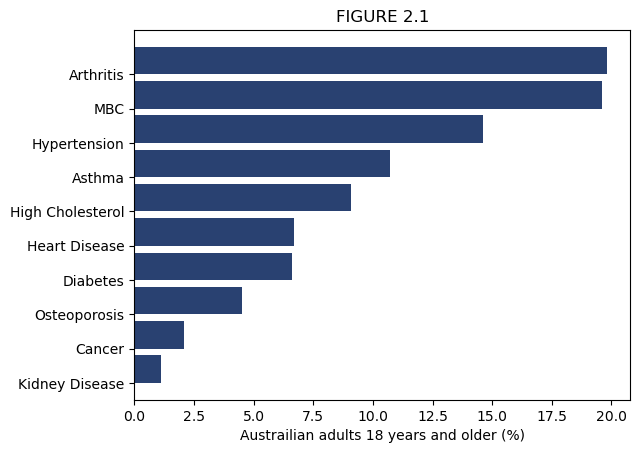

In [26]:
# Example 1B: Create Bar Chart FIGURE 2.1

import matplotlib.pyplot as plt
import pandas as pd

# Sort data
adDF.sort_values(by=['percent', 'disease'], ascending=True, inplace=True)

# Rename category to MBC
adDF['disease'] = adDF['disease'].astype('category')
adDF['disease'] = adDF['disease'].cat.rename_categories({'Mental and Behavioral Conditions': 'MBC'})

# Assign x and y
x=adDF['percent']
y=adDF['disease']

# Plot the bar chart
plt.barh(y, x, align='edge', color='#294171')

# Add labels
plt.ylabel("")
plt.xlabel("Austrailian adults 18 years and older (%)")
plt.title("FIGURE 2.1")

# Show the chart
plt.show()


If the code is correct, you should see the following table:

![___](https://biologicslab.co/BIO5853/images/lesson_01_1_image1.png)


### **Exercise 1: Create Bar Chart**

For **Exercise 1** you are to create a bar chart using data in a file called 

In [75]:
# Example 1: Read data file and create Pandas DataFrame

import pandas as pd

# Read the datafile 
mmDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/maternal_mortality_countries.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 0)
pd.set_option('display.max_columns', 10) 

# Display DataFrame
display(mmDF)

,Country,Year,mortality
1,US,1990,16.900000
2,UK,1990,10.900000
3,Portugal,1990,18.799999
4,Germany,1990,20.200001
5,France,1990,16.900000
6,Canada,1990,6.000000
7,Netherlands,1990,12.000000
8,Spain,1990,12.500000
9,Australia,1990,7.500000
10,Ireland,1990,7.000000


If the code is correct, you should see the following table:

![___](https://biologicslab.co/BIO5853/images/lesson_01_1_image1.png)


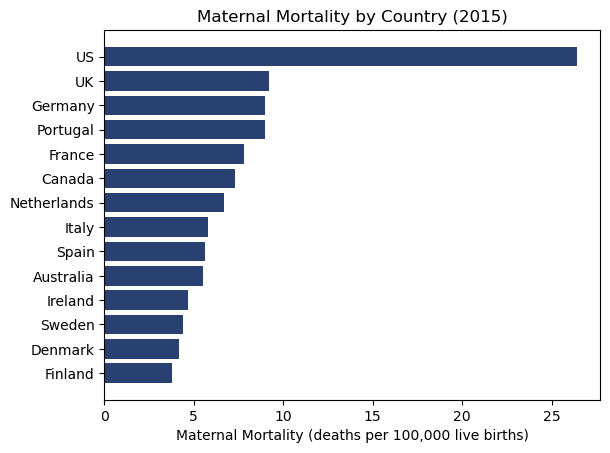

In [81]:
# Insert your code for Exercise 1B here

import matplotlib.pyplot as plt
import pandas as pd

# Create a logical mask
df_mask = mmDF.mask(mask)

# Drop all the NaN values
df_2015=df_mask.dropna()

# Sort data by mortality with highest at top
df_sorted=df_2015.sort_values(by=['mortality'], ascending=True)

# Assign x- and y-values
x=df_sorted['mortality']
y=df_sorted['Country']

# Plot the bar chart
plt.barh(y, x, align='center', color='#294171')

# Add labels
plt.ylabel("")
plt.xlabel("Maternal Mortality (deaths per 100,000 live births)")
plt.title("Maternal Mortality by Country (2015)")

# Show the chart
plt.show()


If the code is correct, you should see the following table:

![___](https://biologicslab.co/BIO5853/images/lesson_01_1_image1.png)


------------------

### **Maternal Mortality**
As of 2021, the maternal mortality rate in the United States was 32.9 deaths per 100,000 live births. This represents an increase compared to 23.8 in 2020 and 20.1 in 2019. Notably, the rate for non-Hispanic Black women was 69.9 deaths per 100,000 live births, significantly higher than the rate for non-Hispanic White women (26.6) and Hispanic women (27.5). Rates also varied by age, with higher rates observed in older age groups. These figures highlight the importance of addressing disparities in maternal health outcomes across different racial and ethnic groups.

--------------

## **Histograms**

A **_Histogram_** is a graph that displays the distribution of continuous data. It’s a powerful exploratory tool because it reveals properties about sample data that summary statistics alone cannot capture. Here’s why histograms matter in biostatistics:

* **Summarizing Patterns:** Histograms help summarize patterns in data. They group data into adjacent intervals (bins) and count how many observations fall into each bin. This provides a quick impression of the data’s general distribution.
* **Normality Assessment:** Biostatisticians often use histograms to assess whether a sample distribution approximates a normal distribution. Deviations from normality can impact statistical analyses.
* **Range and Variability:** By examining a histogram, you can see the data range and get a qualitative sense of variability and central tendency.
* **Probability Estimation:** Histograms allow you to estimate the probability of any value within the continuous variable under study. This is crucial for making inferences and estimating population values from sample results12.

## Example 2: Create a Histogram (FIGURE 2.3)



### Example 2A: Download Dataset


In [84]:
# Example 2A: Read data file and create DataFrame

import pandas as pd

# Read the datafile 
scDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/serum_chol.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10) 

# Display DataFrame
display(scDF)

,level,midpoint,young,old,lower,young_rel_freq,young_cum_freq,old_rel_freq,old_cum_freq,bounds
1,80-119,99.5,13,5,80,1.200000,1.200000,0.400000,0.400000,79.5
2,120-159,139.5,150,48,120,14.100000,15.300000,3.900000,4.300000,119.5
3,160-199,179.5,442,265,160,41.400002,56.700001,21.600000,25.900000,159.5
4,200-239,219.5,299,458,200,28.000000,84.699997,37.299999,63.200001,199.5
5,240-279,259.5,115,281,240,10.800000,95.500000,22.900000,86.099998,239.5
6,280-319,299.5,34,128,280,3.200000,98.699997,10.400000,96.500000,279.5
7,320-359,339.5,9,35,320,0.800000,99.500000,2.900000,99.400002,319.5
8,360-399,379.5,5,7,360,0.500000,100.000000,0.600000,100.000000,359.5
9,400-439,419.5,1,0,400,0.000000,100.000000,0.000000,100.000000,399.5


If the code is correct, you should see the following table:

![___](https://biologicslab.co/BIO5853/images/lesson_01_1_image1.png)


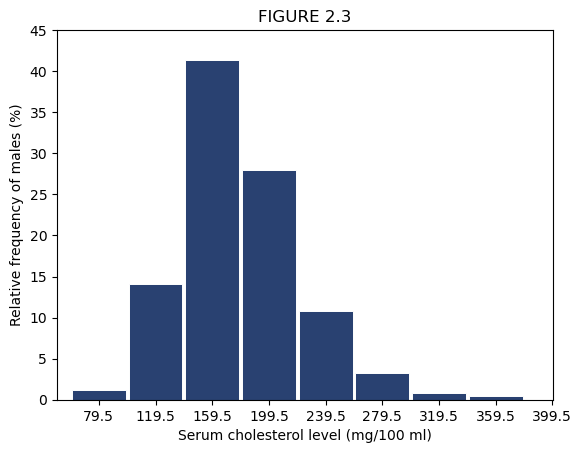

In [85]:
# Example 2B: Create Histogram (FIGURE 2.3)

import matplotlib.pyplot as plt

# Assign x- and y-values
x = scDF.bounds
y = scDF.young_rel_freq

# Prepare for plotting
fig, ax = plt.subplots()

# Plot bar
ax.bar(x, y, width=38, edgecolor="white",
       color='#294171',
       linewidth=0.7)

# Add labels and title
ax.set_xlabel("Serum cholesterol level (mg/100 ml)")
ax.set_ylabel("Relative frequency of males (%)")
ax.set_title("FIGURE 2.3")

# Set tick marks and axes
ax.set_xticks(x)
ax.set(xlim=(50, 400),
       ylim=(0, 45))


# Show plot
plt.show()

If the code is correct, you should see the following table:

![___](https://biologicslab.co/BIO5853/images/lesson_01_1_image1.png)


In [21]:
# Example 1: Read data file and create Pandas DataFrame

import pandas as pd

# Read the datafile 
pimaDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/pima.csv",
   # index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10) 

# Display DataFrame
display(pimaDF)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


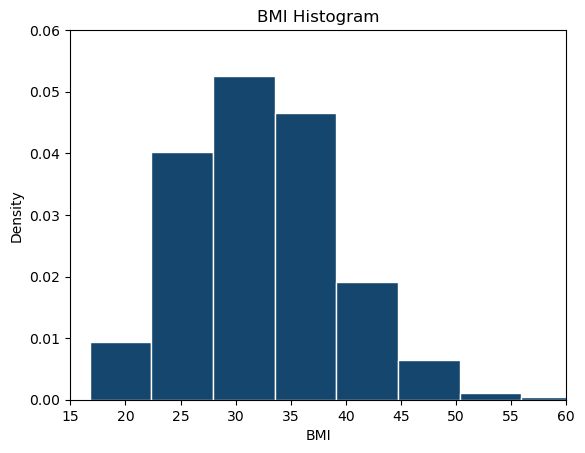

In [22]:

import matplotlib.pyplot as plt

x=pimaDF.BMI

# the histogram of the data
n, bins, patches = plt.hist(x, 12, density=True, 
                            facecolor='#15466d',
                            edgecolor="white",
                            alpha=1.0)


plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('BMI Histogram')
plt.xlim(15, 60)
plt.ylim(0, 0.06)
plt.grid(False)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

x=pimaDF.Glucose

# the histogram of the data
n, bins, patches = plt.hist(x, 12, density=True, 
                            facecolor='#15466d',
                            edgecolor="white",
                            alpha=1.0)


plt.xlabel('Glucose')
plt.ylabel('Density')
plt.title('Bld Glucose Histogram')
plt.xlim(40, 210)
plt.ylim(0, 0.02)
plt.grid(False)
plt.show()

### **Frequency Polygons**

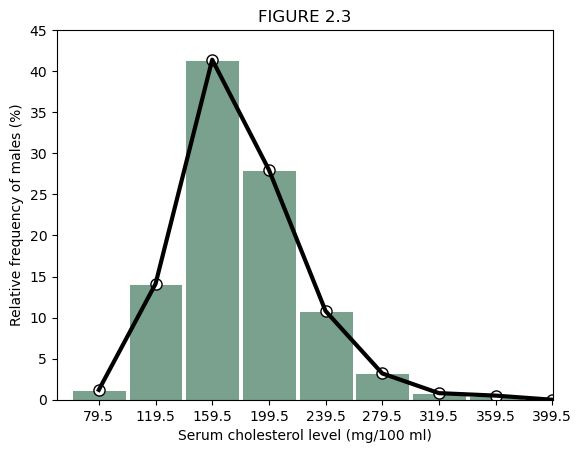

<Figure size 1200x1000 with 0 Axes>

In [5]:
# Figure 2.3

import matplotlib.pyplot as plt
# 
x = scDF.bounds
y = scDF.young_rel_freq

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=38, edgecolor="white",
       color='#79a18d',
       linewidth=0.7)

ax.plot(x, y, marker='o', 
        markerfacecolor='w',
        markeredgecolor='k',
        markersize=8)

ax.plot(x, y, linestyle='-',
        color='k',
       linewidth=3.0)

#ax.set_xlabel('Length (mm)')
ax.set_xlabel("Serum cholesterol level (mg/100 ml)")
ax.set_ylabel("Relative frequency of males (%)")

ax.set_title("FIGURE 2.3")
ax.set_xticks(x)

ax.set(xlim=(50, 400),
       ylim=(0, 45))

plt.figure(figsize=(12,10))
plt.show()

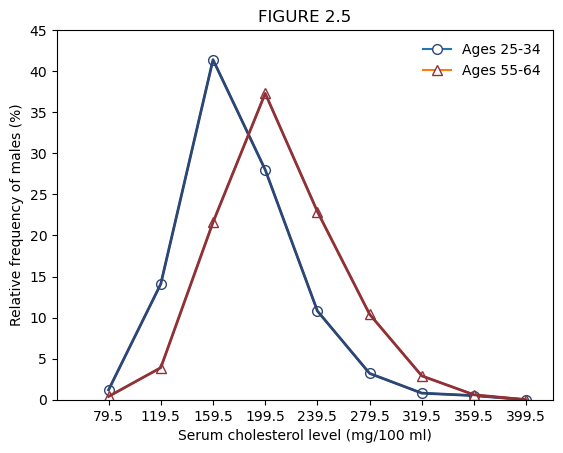

In [6]:
# Figure 2.5

import matplotlib.pyplot as plt
# 
x = scDF.bounds
y1 = scDF.young_rel_freq
y2 = scDF.old_rel_freq

# plot
fig, ax = plt.subplots()

# ax.bar(x, y, width=38, edgecolor="white",
#       color='#79a18d',
#       linewidth=0.7)



line_left, = ax.plot(x, y1, marker='o', 
        markerfacecolor='w',
        markeredgecolor='#2d4674',
        markersize=7,
        label='Ages 25-34')

line_left, ax.plot(x, y1, linestyle='-',
        color='#2d4674',
        linewidth=2.0)

line_right, = ax.plot(x, y2, marker='^', 
        markerfacecolor='w',
        markeredgecolor='#8e3139',
        markersize=7,
        label='Ages 55-64')

line_right, ax.plot(x, y2, linestyle='-',
        color='#8e3139',
        linewidth=2.0)

#ax.set_xlabel('Length (mm)')
ax.set_xlabel("Serum cholesterol level (mg/100 ml)")
ax.set_ylabel("Relative frequency of males (%)")

ax.set_title("FIGURE 2.5")
ax.set_xticks(x)

ax.set(xlim=(40, 420),
       ylim=(0, 45))

ax.legend([line_left, line_right], ['Ages 25-34', 'Ages 55-64'],
          frameon=False)

plt.show()

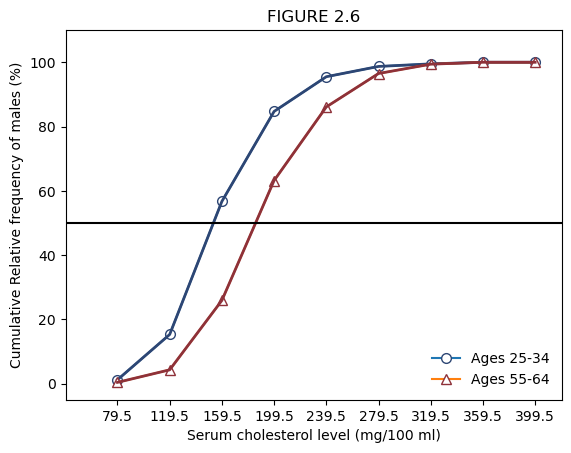

In [7]:
# Figure 2.6

import matplotlib.pyplot as plt

# 
x = scDF.bounds
y1 = scDF.young_cum_freq
y2 = scDF.old_cum_freq

# plot
fig, ax = plt.subplots()

line_left, = ax.plot(x, y1, marker='o', 
        markerfacecolor='w',
        markeredgecolor='#2d4674',
        markersize=7,
        label='Ages 25-34')

line_left, ax.plot(x, y1, linestyle='-',
        color='#2d4674',
        linewidth=2.0)

line_right, = ax.plot(x, y2, marker='^', 
        markerfacecolor='w',
        markeredgecolor='#8e3139',
        markersize=7,
        label='Ages 55-64')

line_right, ax.plot(x, y2, linestyle='-',
        color='#8e3139',
        linewidth=2.0)

#ax.set_xlabel('Length (mm)')
ax.set_xlabel("Serum cholesterol level (mg/100 ml)")
ax.set_ylabel("Cumulative Relative frequency of males (%)")

ax.set_title("FIGURE 2.6")
ax.set_xticks(x)

ax.set(xlim=(40, 420),
       ylim=(-5, 110))

ax.axhline(y=50, color='k')

ax.legend([line_left, line_right], ['Ages 25-34', 'Ages 55-64'], 
          loc='lower right', frameon=False)

plt.show()

## **Box Plots**

In [8]:
# Example 1: Read data file and create Pandas DataFrame

import pandas as pd

# Read the datafile 
drDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/crude_death_rates_us.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10) 

# Display DataFrame
display(drDF)

,state,rate2016,rate2006,rate1996
1,Alabama,1078.800049,1021.5,1002.299988
2,Alaska,605.700012,500.6,425.399994
3,Arizona,817.299988,751.9,826.400024
4,Arkansas,1062.699951,992.6,1057.199951
5,California,668.099976,650.4,700.900024
...,...,...,...,...
47,Virginia,790.200012,754.8,801.500000
48,Washington,751.500000,721.1,763.700012
49,West Virginia,1241.400024,1136.8,1118.400024
50,Wisconsin,896.700012,830.6,874.900024


In [9]:
drDF.describe()

,rate2016,rate2006,rate1996
count,51.000000,51.000000,51.000000
mean,884.449019,838.527451,879.245102
std,131.319077,122.620057,138.055547
min,587.099976,500.600000,425.399994
25%,800.299988,760.650000,804.850006
50%,891.599976,843.600000,904.000000
75%,963.299988,926.550000,952.000000
max,1241.400024,1136.800000,1219.400024


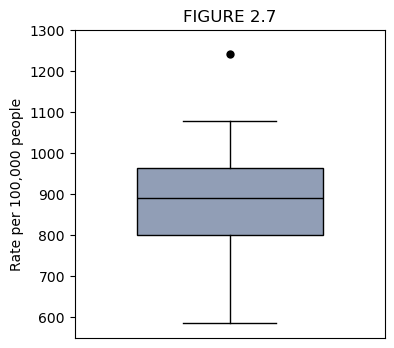

In [11]:
# Figure 2.7

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

x=drDF.rate2016
colors =['#919eb6']


flierprops = dict(marker='o', markerfacecolor='black', markersize=6,
                  markeredgecolor='none')
medianprops = dict(linestyle='-', linewidth=1.0, color='black')

# plot box plot
bplot=ax.boxplot(x, notch=False,
           flierprops=flierprops,
           medianprops=medianprops,
           patch_artist=True,
           widths=0.6)


ax.flierprops = dict(marker='o', markerfacecolor='black', markersize=8,
                  linestyle='none')

ax.set_title('FIGURE 2.7')

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticks([])
ax.set(ylim=(550, 1300))
ax.set_xlabel('')
ax.set_ylabel('Rate per 100,000 people')

plt.show()

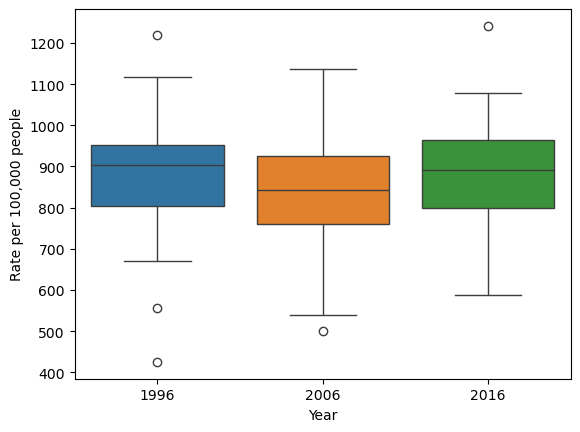

In [12]:
# Figure 2.8
import seaborn as sns
import matplotlib.pyplot as plt

# Drop column
df=drDF.drop(['state'], axis=1)

# Rearrange columns
cols=("rate1996", "rate2006", "rate2016")
df=df[["rate1996", "rate2006", "rate2016"]]

# Rename columns
df.rename(columns={"rate1996" : "1996", "rate2006" : "2006", "rate2016" : "2016"}, inplace=True)

# Plot boxplot
gfg=sns.boxplot(data=df)
gfg.set(xlabel="Year", ylabel="Rate per 100,000 people")

# Show plot
plt.show()

## **Two-Way Scatter Plots**

In [14]:
# Example 1: Read data file and create Pandas DataFrame

import pandas as pd

# Read the datafile 
lcDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/fvc_fev.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10) 

# Display DataFrame
display(lcDF)

,subject_id,fev,fvc
1,1,4.7,5.8
2,2,4.3,5.1
3,3,3.5,4.1
4,4,4.0,5.4
5,5,3.2,4.4
6,6,4.7,5.3
7,7,4.3,6.8
8,8,4.7,5.3
9,9,5.2,6.2
10,10,4.2,6.2


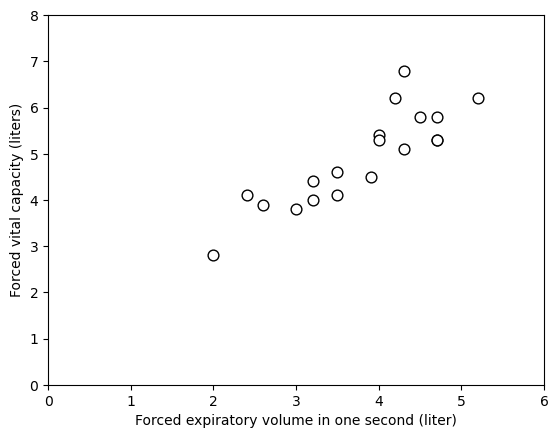

In [15]:
# Figure 2.9

import matplotlib.pyplot as plt

x=lcDF.fev
y=lcDF.fvc

filled_marker_style = dict(marker='o', linestyle=':', markersize=15,
                           color='darkgrey',
                           markerfacecolor='tab:blue',
                           markerfacecoloralt='lightsteelblue',
                           markeredgecolor='brown')
fig, ax = plt.subplots()
ax.scatter(x, y, marker="o", 
           s=60,
           c='white',
           edgecolors='k')

#ax.set_xticks([])
ax.set(xlim=(0,6))
ax.set(ylim=(0,8))
ax.set_xlabel('Forced expiratory volume in one second (liter)')
ax.set_ylabel('Forced vital capacity (liters)')

plt.show()

## **Line Graphs**

In [16]:
# Example 1: Read data file and create Pandas DataFrame

import pandas as pd

# Read the datafile 
mrDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/malaria.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10) 

# Display DataFrame
display(mrDF)

,year,rate
1,1940,59.209999
2,1941,51.139999
3,1942,44.860001
4,1943,40.639999
5,1944,43.369999
...,...,...
72,2011,0.560000
73,2012,0.480000
74,2013,0.510000
75,2014,0.540000


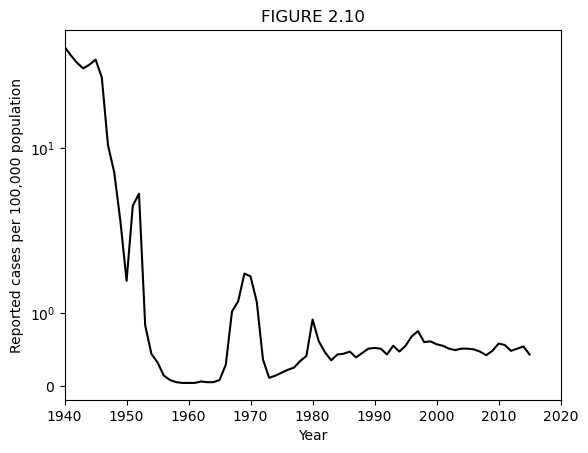

In [17]:
# Figure 2.10

import matplotlib.pyplot as plt

# Assign x and y
x=mrDF.year
y=mrDF.rate


fig, ax = plt.subplots()

# Plot line graph semilog y scale
plt.plot(x,y,c='k')
plt.yscale('symlog')

# Set properties
ax.set(xlim=(1940,2020))
ax.set_xlabel('Year')
ax.set_ylabel('Reported cases per 100,000 population')
ax.set_title("FIGURE 2.10")

# Show plot
plt.show()

In [19]:
# Example 1: Read data file and create Pandas DataFrame

import pandas as pd

# Read the datafile 
hcDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/healthcare_us_canada.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10) 

# Display DataFrame
display(hcDF)

,year,canada,usa
1,1970,7.1,7.400000
2,1975,7.2,7.900000
3,1976,7.0,8.100000
4,1977,7.0,8.300000
5,1978,7.0,8.300000
...,...,...,...
40,2013,11.0,17.200001
41,2014,10.9,17.400000
42,2015,11.4,17.700001
43,2016,11.5,17.900000


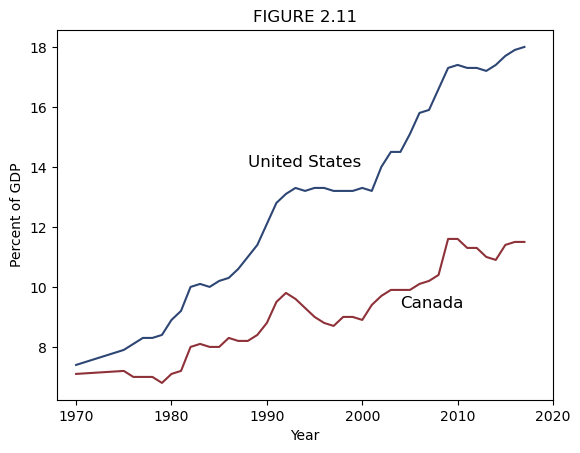

In [20]:
# Figure 2.11

import matplotlib.pyplot as plt

# Assign x and y
x=hcDF.year
y1=hcDF.usa
y2=hcDF.canada

# Plot plot
fig, ax = plt.subplots()
plt.plot(x,y1,c='#2d4674')  # color dark blue
plt.plot(x,y2,c='#8e3139')  # color dark red

# Add text to plot
text_x1=1988
text_y1=14
plt.text(text_x1, text_y1, 'United States', fontsize=12)

text_x2=2004
text_y2=9.3
plt.text(text_x2, text_y2, 'Canada', fontsize=12)

# Set properties
ax.set(xlim=(1968,2020))
ax.set_xlabel('Year')
ax.set_ylabel('Percent of GDP')
ax.set_title("FIGURE 2.11")

# Show plot
plt.show()

In [ ]:
# Example 1: Read data file and create Pandas DataFrame

import pandas as pd

# Read the datafile 
mortDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/dpt_mortality.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10) 

# Display DataFrame
display(mortDF)